<a href="https://colab.research.google.com/github/paridhika/DDL/blob/main/Latency_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Class for Infrastructure

Edge -> Rpi Utilization = 0.6
NE ->  CPU Utilization = 0.8
Cloud ->  GPU
Bandwidth Edge to NE (Mbps) = 1000
Bandwidth Edge to Cloud (Mbps) = 300
Bandwidth NE to Cloud (Mbps) = 300
Propagation Edge to NE (sec)= 0.001
Propagation Edge to Cloud (sec) = 0.1
Latency : 0.06944444444444445 > 0.00035714285714285714 > 3.205128205128205e-06
Cost : 8.020833333333335e-07 > 1.5785714285714286e-07 > 3.646794871794872e-09


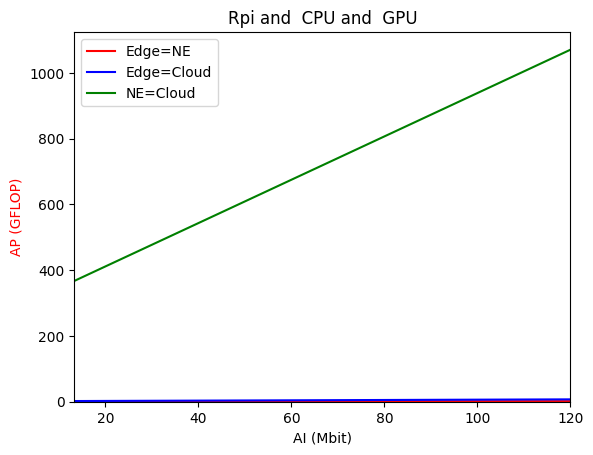

[0.130094891448511, 0.1703610847541781, 0.21062727805984516, 0.25089347136551227, 0.2911596646711793, 0.3314258579768464, 0.37169205128251354, 0.4119582445881806, 0.45222443789384764]
[7.382135439372298, 7.516356083724522, 7.650576728076746, 7.784797372428969, 7.919018016781193, 8.053238661133417, 8.187459305485639, 8.321679949837863, 8.455900594190087]
[37.63785467378712, 38.124311436557626, 38.61076819932814, 39.09722496209866, 39.583681724869166, 40.07013848763968, 40.5565952504102, 41.043052013180706, 41.52950877595122]


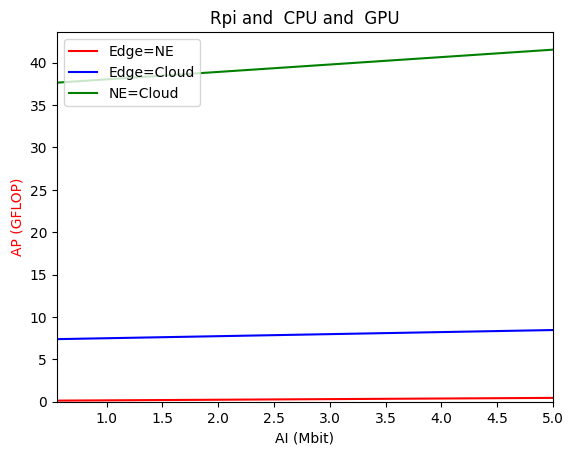

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import csv
locals().clear
globals().clear
class Infrastructure:

    def __init__(self, UtilizationEdge, UtilizationNE, EetoNE, EetoC, NEtoC, PDEtoNE, PDEtoC):
        self.EeP = EeP_Values[edge]
        self.UtilizationEdge = UtilizationEdge
        self.NEnP = ne_ct * NEnP_Values[ne]
        self.UtilizationNE = UtilizationNE
        self.CrP = c_ct * CrP_Values[cloud]
        self.EetoNE = EetoNE
        self.EetoC = EetoC
        self.NEtoC = NEtoC
        self.PDEtoNE = PDEtoNE
        self.PDEtoC = PDEtoC
        self.EeC = EeC_Values[edge]
        self.NEnC = ne_ct * NEnC_Values[ne]
        self.CrC = c_ct * CrC_Values[cloud]
        self.compute_constants()

    def print_configuration(self):
        print("Edge -> " + Device[edge] + " Utilization = " + str(self.UtilizationEdge) )
        print("NE -> " + NE[ne] + " Utilization = " + str(self.UtilizationNE) )
        print("Cloud -> " + Cloud[cloud]  )
        print("Bandwidth Edge to NE (Mbps) = " + str(self.EetoNE))
        print("Bandwidth Edge to Cloud (Mbps) = " + str(self.EetoC))
        print("Bandwidth NE to Cloud (Mbps) = " + str(self.NEtoC))
        print("Propagation Edge to NE (sec)= " + str(self.PDEtoNE))
        print("Propagation Edge to Cloud (sec) = " + str(self.PDEtoC))
        self.check_condition()


    def compute_constants(self):
        self.alphaL = 1/(self.EeP * self.UtilizationEdge)
        self.alphaC = self.EeC/(self.EeP * self.UtilizationEdge)
        self.betaL = 1/(self.NEnP * self.UtilizationNE)
        self.betaC = self.NEnC/(self.NEnP * self.UtilizationNE)
        self.gammaL = 1/self.CrP
        self.gammaC = self.CrC/self.CrP

    def check_condition(self):
        print("Latency : " + str(self.alphaL) + " > " + str(self.betaL) + " > " + str(self.gammaL) )
        print("Cost : " + str(self.alphaC) + " > " + str(self.betaC) + " > " + str(self.gammaC) )

    def compute_k(self):
        return (self.NEnP * self.UtilizationNE)/(self.EeP * self.UtilizationEdge)

    def compute_s(self):
        return self.CrP / (self.NEnP * self.UtilizationNE)

    # Functions for computing latency
    def compute_latency_Edge(self,AP):
      return AP*self.alphaL

    def compute_latency_NE(self, AP, AI):

      return (AI/self.EetoNE) + self.PDEtoNE + (AP*self.betaL)

    def compute_latency_Cloud(self, AP, AI):
      return (AI/self.EetoC) + self.PDEtoC + (AP*self.gammaL)

    def compute_latency_NE_Cloud(self, AP, AI):
      return (AI/self.NEtoC) + self.PDEtoC - self.PDEtoNE + (AP*self.gammaL)

    # Functions for computing cost
    def compute_cost_Edge(self,AP):
      return AP*self.alphaC

    def compute_cost_NE(self, AP, AI):
      transmission_cost = ((AI/self.EetoNE) + self.PDEtoNE) * NTrC
      computation_cost = AP*self.betaC
      return transmission_cost + computation_cost

    def compute_cost_Cloud(self, AP, AI):
      transmission_cost = ((AI/self.EetoC) + self.PDEtoC) * NTrC
      computation_cost = AP*self.gammaC
      return transmission_cost + computation_cost

    def compute_cost_NE_Cloud(self, AP, AI):
      transmission_cost = ((AI/self.NEtoC) + self.PDEtoC - self.PDEtoNE) * NTrC
      computation_cost = AP*self.gammaC
      return transmission_cost + computation_cost

    # Compute slope and intercept for latency equations
    def compute_latency_m1(self):
      return 1/(self.EetoNE * (self.alphaL - self.betaL))

    def compute_latency_c1(self):
        return self.PDEtoNE/(self.alphaL - self.betaL)

    def compute_latency_m2(self):
      return 1/(self.EetoC * (self.alphaL - self.gammaL))

    def compute_latency_c2(self):
        return self.PDEtoC/(self.alphaL - self.gammaL)

    def compute_latency_m3(self):
        return ((1/self.EetoC) - (1/self.EetoNE)) / (self.betaL - self.gammaL)
    def compute_latency_c3(self):
        return (self.PDEtoC - self.PDEtoNE) / (self.betaL - self.gammaL)

    # Compute slope and intercept for cost equations
    def compute_cost_m1(self):
        denom = (self.alphaC - self.gammaC)
        return NTrC/(self.EetoNE * denom)

    def compute_cost_c1(self):
        return (self.PDEtoNE * NTrC)/(self.alphaC - self.betaC)

    def compute_cost_m2(self):
        denom = (self.alphaC - self.gammaC)
        return NTrC/(self.EetoC * denom)

    def compute_cost_c2(self):
        denom = (self.alphaC - self.gammaC)
        return (self.PDEtoC * NTrC)/denom

    def compute_cost_m3(self):
        denom = (self.betaC - self.gammaC)
        return ((1/self.EetoC) - (1/self.EetoNE))*NTrC / denom

    def compute_cost_c3(self):
        denom = (self.betaC - self.gammaC)
        return ((self.PDEtoC - self.PDEtoNE) * NTrC)/denom


    def find_satisfying_AP_latency_AP_Edge_NE(self, AI):
        m1 = self.compute_latency_m1()
        c1 = self.compute_latency_c1()
        return (m1 * AI) + c1

    def find_satisfying_AP_latency_AP_Edge_Cloud(self, AI):
        m2 = self.compute_latency_m2()
        c2 = self.compute_latency_c2()
        return (m2 * AI) + c2

    def find_satisfying_AP_latency_AP_NE_Cloud(self, AI):
        m3 = self.compute_latency_m3()
        c3 = self.compute_latency_c3()
        return (m3 * AI) + c3

    def find_satisfying_AP_cost_AP_Edge_NE(self, AI):
        m1 = self.compute_cost_m1()
        c1 = self.compute_cost_c1()
        return (m1 * AI) + c1

    def find_satisfying_AP_cost_AP_Edge_Cloud(self, AI):
        m2 = self.compute_cost_m2()
        c2 = self.compute_cost_c2()
        return (m2 * AI) + c2

    def find_satisfying_AP_cost_AP_NE_Cloud(self, AI):
        m3 = self.compute_cost_m3()
        c3 = self.compute_cost_c3()
        return (m3 * AI) + c3

    def plot_latency_AP_vs_AI(self, AI_Values):

        alpha_Edge_equal_NE = []
        alpha_Edge_equal_Cloud = []
        alpha_NE_equal_Cloud = []
        AP_Edge_equal_NE = []
        AP_Edge_equal_Cloud = []
        AP_NE_equal_Cloud = []
        global latency_Edge_equal_NE
        global latency_Edge_equal_Cloud
        global latency_NE_equal_Cloud

        for AI in AI_Values:
            AP = self.find_satisfying_AP_latency_AP_Edge_NE(AI)
            latency_Edge_equal_NE.append(self.compute_latency_Edge(AP))
            alpha_Edge_equal_NE.append(AP/AI)
            AP_Edge_equal_NE.append(AP)

            AP = self.find_satisfying_AP_latency_AP_Edge_Cloud(AI)
            AP_Edge_equal_Cloud.append(AP)
            alpha_Edge_equal_Cloud.append(AP/AI)
            latency_Edge_equal_Cloud.append(self.compute_latency_Edge(AP))

            AP = self.find_satisfying_AP_latency_AP_NE_Cloud(AI)
            AP_NE_equal_Cloud.append(AP)
            alpha_NE_equal_Cloud.append(AP/AI)
            latency_NE_equal_Cloud.append(self.compute_latency_Cloud(AP, AI))

        fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()

        # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')

        ax1.plot(AI_Values, AP_Edge_equal_NE, 'r-', label = 'Edge=NE')
        ax1.plot(AI_Values, AP_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        ax1.plot(AI_Values, AP_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        # ax1.plot(AI_Values, alpha_Edge_equal_NE, 'r-', label = 'Edge=NE')
        # ax1.plot(AI_Values, alpha_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        # ax1.plot(AI_Values, alpha_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        ax1.set_xlabel('AI (Mbit)')
        ax1.set_ylabel('AP (GFLOP)', color='r')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper left')

        plt.xlim(left=AI_Values[0])
        plt.xlim(right=AI_Values[-1])
        plt.ylim(bottom=0)

        # plt.title(Device[edge] + ' and ' + str(ne_ct) + " " + NE[ne] + ' and ' + Cloud[cloud])
        plt.title(Device[edge] + ' and ' + NE[ne] + ' and ' + Cloud[cloud])
        # Save the first plot
        # plt.savefig(device + '_' + NE + Cloud + '_latency.png')
        plt.show()

    def plot_cost_AP_vs_AI(self, AI_Values):

        alpha_Edge_equal_NE = []
        alpha_Edge_equal_Cloud = []
        alpha_NE_equal_Cloud = []
        AP_Edge_equal_NE = []
        AP_Edge_equal_Cloud = []
        AP_NE_equal_Cloud = []
        global cost_Edge_equal_NE
        global cost_Edge_equal_Cloud
        global cost_NE_equal_Cloud

        for AI in AI_Values:
            AP = self.find_satisfying_AP_cost_AP_Edge_NE(AI)
            cost_Edge_equal_NE.append(self.compute_cost_Edge(AP))
            alpha_Edge_equal_NE.append(AP/AI)
            AP_Edge_equal_NE.append(AP)

            AP = self.find_satisfying_AP_cost_AP_Edge_Cloud(AI)
            AP_Edge_equal_Cloud.append(AP)
            alpha_Edge_equal_Cloud.append(AP/AI)
            cost_Edge_equal_Cloud.append(self.compute_cost_Edge(AP))

            AP = self.find_satisfying_AP_cost_AP_NE_Cloud(AI)
            AP_NE_equal_Cloud.append(AP)
            alpha_NE_equal_Cloud.append(AP/AI)
            cost_NE_equal_Cloud.append(self.compute_cost_Cloud(AP, AI))

        # print(latency_Edge_equal_NE)
        # print(latency_Edge_equal_Cloud)
        # print(latency_NE_equal_Cloud)

        print(AP_Edge_equal_NE)
        print(AP_Edge_equal_Cloud)
        print(AP_NE_equal_Cloud)

        fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()

        # ax1.plot(alpha_values_latency, k_values_latency, 'k-', label = 'k')

        # ax2.plot(alpha_values, UtilizationEdge, 'r-')

        ax1.plot(AI_Values, AP_Edge_equal_NE, 'r-', label = 'Edge=NE')
        ax1.plot(AI_Values, AP_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        ax1.plot(AI_Values, AP_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        # ax1.plot(AI_Values, alpha_Edge_equal_NE, 'r-', label = 'Edge=NE')
        # ax1.plot(AI_Values, alpha_Edge_equal_Cloud, 'b-', label = 'Edge=Cloud')
        # ax1.plot(AI_Values, alpha_NE_equal_Cloud, 'g-', label = 'NE=Cloud')

        ax1.set_xlabel('AI (Mbit)')
        ax1.set_ylabel('AP (GFLOP)', color='r')

        # Display legend
        lines, labels = ax1.get_legend_handles_labels()
        ax1.legend(lines, labels, loc='upper left')

        plt.xlim(left=AI_Values[0])
        plt.xlim(right=AI_Values[-1])
        plt.ylim(bottom=0)

        plt.title(Device[edge] + ' and ' + NE[ne] + ' and ' + Cloud[cloud])
        # Save the first plot
        # plt.savefig(device + '_' + NE + Cloud + '_latency.png')
        plt.show()


Rpi = [24, 8, 1000, 1.840542 * 10 ** -6]
PC = [900, 128, 10000, 1.155 * 10 ** -5]
Jetson = [512, 4, 1000, 3.76533 * 10 ** -6]
CPU = [3500, 60, 10000, 0.000442]
GPU = [312000, 320, 400000, 0.0011378 ]
TPU = [191667, 192, 50000, 0.0003]

Device = ['Rpi', 'Jetson', 'PC']
NE = [' CPU', ' GPU', ' TPU']
Cloud = [' CPU', ' GPU', ' TPU']

EeP_Values = [Rpi[0], Jetson[0], PC[0] ]
EeC_Values = [PC[3], Jetson[3], Rpi[3]]
NEnP_Values = [CPU[0], GPU[0], TPU[0]]
NEnC_Values = [CPU[3], GPU[3], TPU[3]]
CrP_Values = [CPU[0], GPU[0], TPU[0]]
CrC_Values = [CPU[3], GPU[3], TPU[3]]

Utilization_Values = [0.2, 0.4, 0.6, 0.8]

EetoNE_Values = [500,1000]
PDEtoNE_Values = [0.001]
EetoC_Values = [300,600, 900]
PDEtoC_Values = [0.1]

# AI_Values =  [1, 300, 500, 800, 1000, 1200, 1500] # 6 regions
# AI_Values =  [0.1, 1, 10, 20] # 4 regions
AI_Values = np.linspace(0, 120, 10)[1:]


NTrC = 5.787 * 10 ** -5
latency_Edge_equal_NE = []
latency_Edge_equal_Cloud = []
latency_NE_equal_Cloud = []

cost_Edge_equal_NE = []
cost_Edge_equal_Cloud = []
cost_NE_equal_Cloud = []

edge = 0
ne = 0
cloud = 1
ne_ct = 1
c_ct = 1
system =  Infrastructure(Utilization_Values[2],Utilization_Values[3],EetoNE_Values[1],EetoC_Values[0],EetoC_Values[0],PDEtoNE_Values[0],PDEtoC_Values[0])
system.print_configuration()
system.plot_latency_AP_vs_AI( AI_Values)
AI_Values = np.linspace(0, 5, 10)[1:]

system.plot_cost_AP_vs_AI( AI_Values)
# system.plot_AP_vs_AI( [256*x for x in layer_AI], 2,0,2)

# AI_Values = np.linspace(400, 600, 2)
# AP_Values = np.linspace(0, 40, 5)[1:]
# for AI in AI_Values:
#   for AP in AP_Values:
#     region = system.identify_region(AP,AI)
    # print(region)

# split_algorithm(system,0,len(layer_AP)-140, 0)



# Model - ResNet50

In [9]:
from keras.api._v2.keras.layers import Activation
import tensorflow as tf
import numpy as np


class Model:

    def __init__(self,model):
      self.model = model
      self.layer_AI = []
      self.layer_AP = []

    def store_AP_AI(self,layer_AP,layer_AI):
      self.layer_AI = layer_AI
      self.layer_AP = layer_AP

    # model_input_shape = (batch_size, 224, 224, 3)

    # Define a function to compute the number of operations for a Conv2D layer
    def compute_ops_conv2d(self,layer):
        kernel_size = layer.kernel_size[0]
        in_channels = layer.input_shape[-1]
        out_channels = layer.output_shape[-1]
        input_height, input_width = layer.input_shape[1:3]
        output_height, output_width = layer.output_shape[1:3]
        ops = kernel_size**2 * in_channels * output_height * output_width * out_channels
        return ops

    # Define a function to compute the number of operations for a MaxPooling2D layer
    def compute_ops_maxpool2d(self,layer):
        pool_size = layer.pool_size[0]
        in_channels = layer.input_shape[-1]
        input_height, input_width = layer.input_shape[1:3]
        output_height, output_width = layer.output_shape[1:3]
        ops = pool_size**2 * in_channels * output_height * output_width
        return ops

    # Define a function to compute the number of operations for a BatchNormalization layer
    def compute_ops_batchnorm(self,layer):
        # Get input shape
        input_shape = layer.input_shape[1:]
        in_channels = input_shape[-1]

        # Number of operations per element (2 for mean and variance)
        ops = 2 * in_channels

        return ops

    # Define a function to compute the number of operations for a ReLU layer
    def compute_ops_relu(self,layer):

        input_shape = layer.input_shape[1:]
        # Number of operations per element
        ops = 1
        for dim in input_shape:
            ops *= dim

        return ops

    # Define a function to compute the number of operations for the output layer
    def compute_ops_output(self,layer):
        num_input_channels = layer.input_shape[-1]
        num_output_channels = layer.output_shape[-1]
        fc_ops = (num_input_channels * num_output_channels) + num_output_channels
        if type(layer.activation) == tf.keras.activations.softmax or type(layer.activation) == tf.keras.activations.sigmoid:
            num_elements = tf.reduce_prod(layer.output_shape[1:])
            act_ops = num_elements
        else:
            act_ops = 0
        ops = fc_ops + act_ops
        return ops

    # Define a function to compute the number of operations for a padding layer
    def compute_ops_pad(self,layer):
        in_channels = layer.input_shape[-1]
        input_height, input_width = layer.input_shape[1:3]
        # Get the padding parameter from the layer's configuration
        padding = layer.get_config()['padding']

        top_padding = padding[0][0]
        bottom_padding = padding[0][1]
        left_padding = padding[1][0]
        right_padding = padding[1][1]
        total_padding = top_padding + bottom_padding + left_padding + right_padding
        ops = 2 * in_channels * input_height * input_width * total_padding
        return ops

    # Define a function to compute the number of operations for a padding layer
    def compute_ops_add(self,layer):
        in_channels = layer.input_shape[0][-1]
        input_height, input_width = layer.input_shape[0][1:3]
        ops = 2 * in_channels * input_height * input_width
        return ops
    # Print the number of operations for each layer in the model


    def compute_model(self):
        i = 0
        # Define a dictionary to store the number of operations for each layer
        ops_dict = {}
        # Compute the number of operations for each layer in the model
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                ops = self.compute_ops_conv2d(layer)
            elif isinstance(layer, tf.keras.layers.MaxPooling2D):
                ops = self.compute_ops_maxpool2d(layer)
            elif isinstance(layer, tf.keras.layers.BatchNormalization):
                ops = self.compute_ops_batchnorm(layer)
            elif isinstance(layer, tf.keras.layers.Activation):
                ops = self.compute_ops_relu(layer)
            elif isinstance(layer, tf.keras.layers.Dense):
                ops = self.compute_ops_output(layer)
            elif "pad" in layer.name:
                ops = self.compute_ops_pad(layer)
            elif "add" in layer.name:
                ops = self.compute_ops_add(layer)
            else:
                ops = 0
            ops_dict[layer.name] = [ops, layer.input_shape, layer.output_shape]
            # print(layer.get_config())

        ct = 1

        for layer_name, (ops, inp, out) in ops_dict.items():
            inp_size = 0

            if inp[0] is not None:
              (n,l,h,w) = inp[0]
              inp_size += l*h*w/1000000

              if len(inp) == 2:
                (n,l,h,w) = inp[1]
                inp_size += l*h*w/1000000

            elif len(inp) > 2:
              inp_size += inp[1]*inp[2] * inp[3]/1000000
            else:
              inp_size += inp[1]/1000000

            if i == 0:
              (n,l,h,w) = inp[0]
              i = i+10
              params = l*h*w
            # print(layer_name, ops, inp_size)
            if ops != 0:
              # print(layer_name, ops, layer.input_shape)
              self.layer_AP.append(ops/1000000000)
              self.layer_AI.append(inp_size*8)
            # else:
            #   print(layer_name, ops, layer.input_shape)
            #   print(ct)
            # ct = ct + 1


# Instantiate the ResNet50 model
model =  tf.keras.applications.resnet.ResNet50(weights=None)
ResNet50 = Model(model)
ResNet50.compute_model()
# print(len(ResNet50.layer_AP))


Batch_Size = 1

layer_AP = [Batch_Size * x for x in ResNet50.layer_AP]
layer_AI = [Batch_Size * x for x in ResNet50.layer_AI]
ResNet50.store_AP_AI(layer_AP,layer_AI)

model = tf.keras.applications.vgg16.VGG16(weights=None)
VGG16 = Model(model)
VGG16.compute_model()

model =  tf.keras.applications.resnet.ResNet152(weights='imagenet')
ResNet152 = Model(model)
ResNet152.compute_model()

model =  tf.keras.applications.InceptionResNetV2(weights=None)
InceptionResNetV2 = Model(model)
InceptionResNetV2.compute_model()



# Split algorithm for latency

In [57]:
class minimum_Latency:
    def __init__(self,edge,NE,latency,cost):
        self.edge = edge
        self.NE = NE
        self.latency = latency
        self.cost = cost

def compute_sum(start,end):
        return sum(layer_AP[start:end])

def split_algorithm_latency(start, end):

    global latency_Edge
    global latency_Cloud
    global latency_NE
    global layer_values

    global AP_1
    global AP_2

    global cost_Edge
    global cost_Cloud
    global cost_NE

    AP = compute_sum(start,end)

    for layer in range(start,end):
        layer_values.append(layer)
        AI_l = layer_AI[layer]
        AP_Edge = compute_sum(layer,end)
        AP_1.append(AP-AP_Edge)
        AP_2.append(AP_Edge)
        latency_Edge.append(system.compute_latency_Edge(AP-AP_Edge))
        latency_NE.append(system.compute_latency_NE(AP_Edge,AI_l))
        latency_Cloud.append(system.compute_latency_Cloud(AP_Edge, AI_l))

        cost_Edge.append(system.compute_cost_Edge(AP-AP_Edge))
        cost_NE.append(system.compute_cost_NE(AP_Edge,AI_l))
        cost_Cloud.append(system.compute_cost_Cloud(AP_Edge, AI_l))
    # print(latency_Edge[::-1])
    print(latency_Edge)
    print(latency_NE)
    print(latency_Cloud)

    print(cost_Edge)
    print(cost_NE)
    print(cost_Cloud)

    # index = latency_NE.index(min(latency_NE))
    # print(index)
    # print(min(latency_NE))
    # print(latency_Edge[index-1])
    # print(layer_values)
    global optimal
    optimal = minimum_Latency(end,0,system.compute_latency_Edge(AP),system.compute_cost_Edge(AP))
    if latency_NE[0] < optimal.latency:
        optimal = minimum_Latency(-1,len(layer_AI),latency_NE[0],cost_NE[0])
        # print(optimal.compute_latency())
    if latency_Cloud[0] < optimal.latency:
        optimal = minimum_Latency(-1,-1,latency_Cloud[0])
        # print(optimal.compute_latency())
    for ind in layer_values[0:len(layer_values)]:
        lat1 = latency_Edge[ind] + latency_NE[ind]
        lat2 = latency_Edge[ind] + latency_Cloud[ind]
        cost1 = cost_Edge[ind] + cost_NE[ind]
        cost2 = cost_Edge[ind] + cost_Cloud[ind]

        # print(lat1)
        # print(lat2)
        if lat1 < lat2:
            if lat1 < optimal.latency:
                optimal = minimum_Latency(ind,len(layer_AI),lat1,cost1)
                print("lat1")
        elif lat2 < lat1:
            if lat2 < optimal.latency:
                # optimal = minimum_Latency(ind,ind,lat2,cost2)
                print("lat2")
            latency_NE_back = []
            latency_NE_Cloud = []
            AP_E =[]
            AP_NE = []
            AP_C = []

            for back in range(1,ind):
                AI_l = layer_AI[back]
                # AP_l = compute_sum(back,ind)
                AP_E.append(AP_1[back])
                AP_NE.append(AP_1[ind]-AP_1[back])
                AP_C.append(AP_2[ind])
                latency_NE_Cloud.append(system.compute_latency_NE_Cloud(AP_2[ind],layer_AI[ind]))
                latency_NE_back.append(system.compute_latency_NE(AP_1[ind]-AP_1[back],AI_l))
                value = latency_Edge[back] + system.compute_latency_NE(AP_1[ind]-AP_1[back],AI_l) + system.compute_latency_NE_Cloud(AP_2[ind],layer_AI[ind])
                cost = cost_Edge[back] + system.compute_cost_NE(AP_1[ind]-AP_1[back],AI_l) + system.compute_cost_NE_Cloud(AP_2[ind],layer_AI[ind])
                # print(value)
                if value < optimal.latency:
                    optimal = minimum_Latency(back,ind,value,cost)
                    print("here")
            # sum_AP = [(x + y + z) for x,y,z in zip(AP_E,AP_NE,AP_C)]
            # print(sum_AP)

# layer_AI = input
# layer_AI[0] = Batch_Size * layer_AI[0]
latency_Edge = []
latency_Cloud = []
latency_NE = []
layer_values = []
AP_1 = []
AP_2 = []
cost_Edge = []
cost_Cloud = []
cost_NE = []

Batch_Size1 = 8
Batch_Size2 = 16
Batch_Size3 = 8

# layer_AP =   [Batch_Size1 * x for x in ResNet152.layer_AP] + [Batch_Size1 * x for x in ResNet50.layer_AP] + [Batch_Size2 * x for x in InceptionResNetV2.layer_AP] + [Batch_Size3 * x for x in ResNet152.layer_AP]
# layer_AI =   [Batch_Size1 * x for x in ResNet152.layer_AI] + [Batch_Size1 * x for x in ResNet50.layer_AI] + [Batch_Size2 * x for x in InceptionResNetV2.layer_AI] + [Batch_Size3 * x for x in ResNet152.layer_AI]

# layer_AP = ResNet50.layer_AP
# layer_AI = ResNet50.layer_AI

# layer_AP = InceptionResNetV2.layer_AP
# layer_AI = InceptionResNetV2.layer_AI

layer_AP =  [Batch_Size1 * x for x in ResNet50.layer_AP]
layer_AI =  [Batch_Size1 * x for x in ResNet50.layer_AI]

# layer_AP =  [Batch_Size1 * x for x in ResNet152.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in ResNet152.layer_AI]

# layer_AP =  [Batch_Size1 * x for x in InceptionResNetV2.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in InceptionResNetV2.layer_AI]

# system.EetoNE = 322  # ResNet50
system.EetoNE = 20
system.NEtoC = 4
system.EetoC = 4
# print(optimal.compute_latency())
split_algorithm_latency(0,len(layer_AI))
print("edge = " + str(optimal.edge) + " : NE = " + str(optimal.NE))
print(optimal.latency)
print(optimal.cost)
print(len(layer_AP))

[0.0, 0.0020070400000000215, 0.06757034666666625, 0.06757041777777732, 0.06801642666666607, 0.07158449777777737, 0.07258801777777737, 0.07972415999999946, 0.07972423111111078, 0.07983573333333278, 0.144061013333333, 0.1440610844444443, 0.1441725866666663, 0.17271715555555486, 0.20126172444444393, 0.20126200888888848, 0.20126229333333276, 0.20215431111111054, 0.20260031999999953, 0.23114488888888834, 0.23114495999999943, 0.23125646222222168, 0.2954817422222216, 0.2954818133333327, 0.29559331555555496, 0.3241378844444435, 0.3241381688888881, 0.32503018666666583, 0.32547619555555485, 0.35402076444444364, 0.3540208355555547, 0.354132337777777, 0.4183576177777769, 0.41835768888888797, 0.41846919111111025, 0.4470137599999988, 0.44701404444444337, 0.4479060622222211, 0.44835207111111014, 0.46262435555555453, 0.46262449777777664, 0.4626802488888878, 0.5269055288888875, 0.5269056711111096, 0.5269614222222208, 0.5840505599999984, 0.6125951288888877, 0.6125956977777766, 0.6125962666666653, 0.6130

# Split Algorithm for cost

In [58]:
class minimum_cost:
    def __init__(self,edge,NE,latency,cost):
        self.edge = edge
        self.NE = NE
        self.latency = latency
        self.cost = cost


def compute_sum(start,end):
        return sum(layer_AP[start:end])

def split_algorithm_cost(start, end):

    global cost_Edge
    global cost_Cloud
    global cost_NE
    global layer_values

    global AP_1
    global AP_2

    global latency_Edge
    global latency_Cloud
    global latency_NE

    AP = compute_sum(start,end)

    for layer in range(start,end):
        layer_values.append(layer)
        AI_l = layer_AI[layer]
        AP_Edge = compute_sum(layer,end)
        AP_1.append(AP-AP_Edge)
        AP_2.append(AP_Edge)
        cost_Edge.append(system.compute_cost_Edge(AP-AP_Edge))
        cost_NE.append(system.compute_cost_NE(AP_Edge,AI_l))
        cost_Cloud.append(system.compute_cost_Cloud(AP_Edge, AI_l))

        latency_Edge.append(system.compute_latency_Edge(AP-AP_Edge))
        latency_NE.append(system.compute_latency_NE(AP_Edge,AI_l))
        latency_Cloud.append(system.compute_latency_Cloud(AP_Edge, AI_l))

    print(latency_Edge)
    print(latency_NE)
    print(latency_Cloud)

    print(cost_Edge)
    print(cost_NE)
    print(cost_Cloud)

    # index = cost_NE.index(min(cost_NE))
    # print(index)
    # print(min(cost_NE))
    # print(cost_Edge[index-1])
    # print(layer_values)
    global optimal
    optimal = minimum_cost(end,0,system.compute_latency_Edge(AP),system.compute_cost_Edge(AP))
    if cost_NE[0] < optimal.cost:
        optimal = minimum_cost(-1,len(layer_AI),latency_NE[0], cost_NE[0])
        # print(optimal.compute_cost())
    if cost_Cloud[0] < optimal.cost:
        optimal = minimum_cost(-1,-1,latency_Cloud[0],cost_Cloud[0])
        # print(optimal.compute_cost())
    for ind in layer_values[0:len(layer_values)]:
        lat1 = latency_Edge[ind] + latency_NE[ind]
        lat2 = latency_Edge[ind] + latency_Cloud[ind]
        cost1 = cost_Edge[ind] + cost_NE[ind]
        cost2 = cost_Edge[ind] + cost_Cloud[ind]
        # print(lat1)
        # print(lat2)
        if cost1 < cost2:
            if cost1 < optimal.cost:
                optimal = minimum_cost(ind,len(layer_AI),lat1,cost1)
                print("cost1")
        elif cost2 < cost1:
            if cost2 < optimal.cost:
                # optimal = minimum_cost(ind,ind,lat2,cost2)
                print("cost2")
            cost_NE_back = []
            cost_NE_Cloud = []
            AP_E =[]
            AP_NE = []
            AP_C = []

            for back in range(1,ind):
                AI_l = layer_AI[back]
                # AP_l = compute_sum(back,ind)
                AP_E.append(AP_1[back])
                AP_NE.append(AP_1[ind]-AP_1[back])
                AP_C.append(AP_2[ind])
                cost_NE_Cloud.append(system.compute_cost_NE_Cloud(AP_2[ind],layer_AI[ind]))
                cost_NE_back.append(system.compute_cost_NE(AP_1[ind]-AP_1[back],AI_l))
                latency = latency_Edge[back] + system.compute_latency_NE(AP_1[ind]-AP_1[back],AI_l) + system.compute_latency_NE_Cloud(AP_2[ind],layer_AI[ind])
                value = cost_Edge[back] + system.compute_cost_NE(AP_1[ind]-AP_1[back],AI_l) + system.compute_cost_NE_Cloud(AP_2[ind],layer_AI[ind])
                # print(value)
                if value < optimal.cost:
                    optimal = minimum_cost(back,ind,latency,value)
                    print("here")
            # sum_AP = [(x + y + z) for x,y,z in zip(AP_E,AP_NE,AP_C)]
            # print(sum_AP)

# layer_AI = input
# layer_AI[0] = Batch_Size * layer_AI[0]
cost_Edge = []
cost_Cloud = []
cost_NE = []
layer_values = []
latency_Edge = []
latency_Cloud = []
latency_NE = []
layer_values = []
AP_1 = []
AP_2 = []

Batch_Size1 = 1
Batch_Size2 = 16
Batch_Size3 = 8

# layer_AP =   [Batch_Size1 * x for x in ResNet152.layer_AP] + [Batch_Size1 * x for x in ResNet50.layer_AP] + [Batch_Size2 * x for x in InceptionResNetV2.layer_AP] + [Batch_Size3 * x for x in ResNet152.layer_AP]
# layer_AI =   [Batch_Size1 * x for x in ResNet152.layer_AI] + [Batch_Size1 * x for x in ResNet50.layer_AI] + [Batch_Size2 * x for x in InceptionResNetV2.layer_AI] + [Batch_Size3 * x for x in ResNet152.layer_AI]

# layer_AP = ResNet50.layer_AP
# layer_AI = ResNet50.layer_AI

# layer_AP = InceptionResNetV2.layer_AP
# layer_AI = InceptionResNetV2.layer_AI

# layer_AP =  [Batch_Size1 * x for x in ResNet50.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in ResNet50.layer_AI]

# layer_AP =  [Batch_Size1 * x for x in ResNet152.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in ResNet152.layer_AI]

# layer_AP =  [Batch_Size1 * x for x in InceptionResNetV2.layer_AP]
# layer_AI =  [Batch_Size1 * x for x in InceptionResNetV2.layer_AI]

# system.EetoNE = 322  # ResNet50
# system.EetoNE = 20
# system.NEtoC = 300
# print(optimal.compute_cost())
split_algorithm_cost(0,len(layer_AI))
print("edge = " + str(optimal.edge) + " : NE = " + str(optimal.NE))
print(optimal.latency)
print(optimal.cost)

print(len(layer_AP))

[0.0, 0.0020070400000000215, 0.06757034666666625, 0.06757041777777732, 0.06801642666666607, 0.07158449777777737, 0.07258801777777737, 0.07972415999999946, 0.07972423111111078, 0.07983573333333278, 0.144061013333333, 0.1440610844444443, 0.1441725866666663, 0.17271715555555486, 0.20126172444444393, 0.20126200888888848, 0.20126229333333276, 0.20215431111111054, 0.20260031999999953, 0.23114488888888834, 0.23114495999999943, 0.23125646222222168, 0.2954817422222216, 0.2954818133333327, 0.29559331555555496, 0.3241378844444435, 0.3241381688888881, 0.32503018666666583, 0.32547619555555485, 0.35402076444444364, 0.3540208355555547, 0.354132337777777, 0.4183576177777769, 0.41835768888888797, 0.41846919111111025, 0.4470137599999988, 0.44701404444444337, 0.4479060622222211, 0.44835207111111014, 0.46262435555555453, 0.46262449777777664, 0.4626802488888878, 0.5269055288888875, 0.5269056711111096, 0.5269614222222208, 0.5840505599999984, 0.6125951288888877, 0.6125956977777766, 0.6125962666666653, 0.6130